In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import math


experiment_names = ['owl_exp_pure',
                    'owl_exp_mixed',
                    'strike_exp_pure',
                    'strike_exp_mixed',
                    'energy_gain_pure',
                    'energy_gain_mixed',
                    ]
totals = []
point_class_dfs = []
parameters = []
for label in experiment_names:
    file_path_pcs = '/home/mremington/Documents/uumarrty_post_sim/uumarrty_post_sim_analysis/per_cycle_analysis/nash_data/{}_point_classifacation.csv'.format(label)
    temp_exp_pc = pd.read_csv(file_path_pcs,header = 0, index_col=None)
    point_class_dfs.append(temp_exp_pc)
    for i in range(1,7):
        file_path_totals = '/home/mremington/Documents/uumarrty_exps/{}/exp{}/Data/totals.csv'.format(label,i)
        temp_exp_total = pd.read_csv(file_path_totals,header = 0, index_col=None)
        temp_exp_total['experiment_name'] = [label for i in range(len(temp_exp_total))]
        totals.append(temp_exp_total)
        file_path_parameters = '/home/mremington/Documents/uumarrty_exps/{}/exp{}/Data/parameters.csv'.format(label,i)
        temp_exp_par = pd.read_csv(file_path_parameters,header = 0, index_col=None)
        temp_exp_par['experiment_name'] = [label for i in range(len(temp_exp_par))]
        parameters.append(temp_exp_par)

        
totals = pd.concat(totals, ignore_index=False)
pc_dfs = pd.concat(point_class_dfs, ignore_index=False)
par= pd.concat(parameters, ignore_index=False)

result = pd.merge(pc_dfs,
                  totals[['sim_id','data_type','mean_bush_pref']],
                  how="left",
                  left_on=['sim_id','org'],
                  right_on=["sim_id", "data_type"])

result['figure_label'] = [x[-1] for x in list(result['exp'])]
def format_title(exp_title,remove_exp_type=False):
    if remove_exp_type:
        title = exp_title.replace("_", " ").replace('pure','').replace('mixed','').title()
    else:
        title=exp_title.replace("_", " ").title()
    return title

In [2]:
result.head()

,exp_name,sim_id,exp,org,count_str_flip,mean_strategy_flip_time,std_strategy_flip_time,var_strategy_flip_time,mean_magnitude_of_strategy_flip,std_magnitude_of_strategy_flip,var_magnitude_of_strategy_flip,nash_val,data_type,mean_bush_pref,figure_label
0,owl_exp_pure,06028c5bc0bb4674a7d322d9ac32ed5e,experiment1,krat,356,16.833803,12.288573,151.009024,0.843390,0.360106,0.129677,0,krat,0.514374,1
1,owl_exp_pure,06028c5bc0bb4674a7d322d9ac32ed5e,experiment1,snake,373,2.663978,1.234060,1.522904,0.887674,0.263518,0.069442,0,snake,0.494487,1
2,owl_exp_pure,078a550708c94ad589f54acb02b8b55a,experiment1,krat,385,15.484375,10.767651,115.942314,0.805410,0.393076,0.154509,0,krat,0.547678,1
3,owl_exp_pure,078a550708c94ad589f54acb02b8b55a,experiment1,snake,383,2.591623,1.096754,1.202869,0.909786,0.211419,0.044698,0,snake,0.463121,1
4,owl_exp_pure,0ebf538877ac46fda69541db6a494fa0,experiment1,krat,372,16.123989,10.884938,118.481882,0.852848,0.351398,0.123480,0,krat,0.504739,1


In [2]:
#Krats

temp_krat=result[result['org']=='krat']
temp_krat=temp_krat.groupby(['exp_name','figure_label','sim_id'])['nash_val'].agg(['max'])
temp_krat=temp_krat.reset_index()
nash_scores_krat=temp_krat.groupby(['exp_name','figure_label'])['max'].agg(['count','sum'])
nash_scores_krat=nash_scores_krat.reset_index()
nash_scores_krat['nash_score']=nash_scores_krat['sum']/nash_scores_krat['count']
nash_scores_krat['Experiment'] = nash_scores_krat['exp_name'].apply(format_title)
nash_scores_krat=nash_scores_krat[['Experiment','figure_label','nash_score']]
nash_scores_krat=nash_scores_krat.pivot(index='Experiment', columns='figure_label', values='nash_score')

nash_scores_krat.head()

figure_label,1,2,3,4,5,6
Experiment,,,,,,
Energy Gain Mixed,0.0,0.0,0.0,0.00,0.00,0.0
Energy Gain Pure,0.0,0.0,0.0,0.00,0.00,0.0
Owl Exp Mixed,0.0,0.0,0.0,0.00,0.68,1.0
Owl Exp Pure,0.0,0.0,0.0,0.58,1.00,1.0
Strike Exp Mixed,0.0,0.0,0.0,0.00,0.00,0.0


In [3]:
#Snakes

temp_snake=result[result['org']=='snake']
temp_snake=temp_snake.groupby(['exp_name','figure_label','sim_id'])['nash_val'].agg(['max'])
temp_snake=temp_snake.reset_index()
nash_scores_snake=temp_snake.groupby(['exp_name','figure_label'])['max'].agg(['count','sum'])
nash_scores_snake=nash_scores_snake.reset_index()
nash_scores_snake['nash_score']=nash_scores_snake['sum']/nash_scores_snake['count']
nash_scores_snake['Experiment'] = nash_scores_snake['exp_name'].apply(format_title)
nash_scores_snake=nash_scores_snake[['Experiment','figure_label','nash_score']]
nash_scores_snake=nash_scores_snake.pivot(index='Experiment', columns='figure_label', values='nash_score')
nash_scores_snake.head()

figure_label,1,2,3,4,5,6
Experiment,,,,,,
Energy Gain Mixed,0.0,0.0,0.00,0.00,0.00,0.00
Energy Gain Pure,0.0,0.0,0.02,0.54,0.56,0.64
Owl Exp Mixed,0.0,0.0,0.00,0.00,0.00,0.00
Owl Exp Pure,0.0,0.0,0.00,0.26,0.00,0.00
Strike Exp Mixed,0.0,0.0,0.00,0.00,0.00,0.00


In [23]:
#help(sns.color_palette)

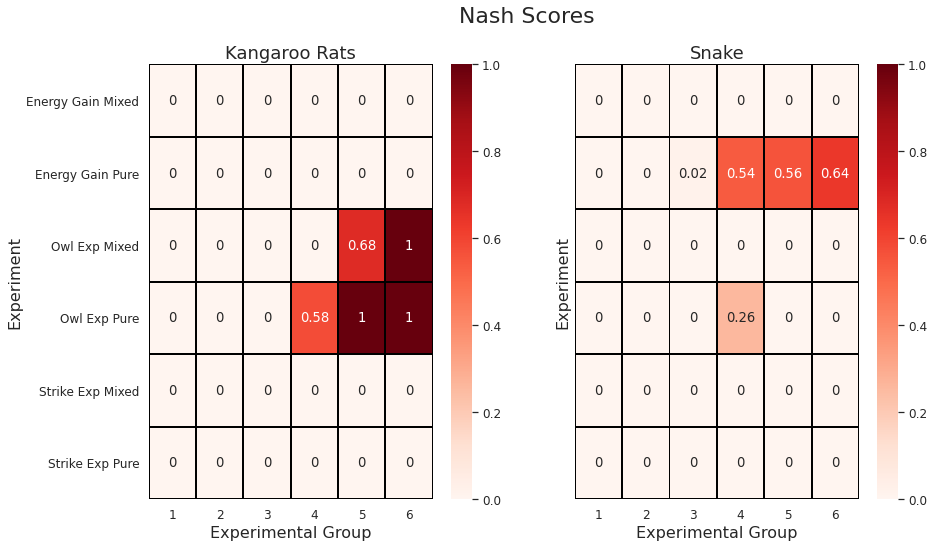

In [14]:
import seaborn as sns
#sns.set_context(rc={'figure.figsize':(30,20)}) 
fig, axes = plt.subplots(1, 2, sharex=False,sharey=True, figsize=(14,8))
sns.set(font_scale=1.1)
ax1 = sns.heatmap(ax=axes[0],data=nash_scores_krat,annot=True,cmap='Reds',linewidths=1, linecolor='black')
ax1.axes.set_title("Kangaroo Rats",fontsize=18)
ax1.set_xlabel('Experimental Group',fontsize=16)
ax1.set_ylabel('Experiment',fontsize=16)

ax2 = sns.heatmap(ax=axes[1],data=nash_scores_snake,annot=True,cmap='Reds',linewidths=1, linecolor='black', vmax=1)
ax2.axes.set_title("Snake",fontsize=18)
ax2.set_xlabel('Experimental Group',fontsize=16)
ax2.set_ylabel('Experiment',fontsize=16)
fig.suptitle('Nash Scores',fontsize=22)
#plt.savefig('/home/mremington/Documents/uumarrty_post_sim/uumarrty_post_sim_analysis/images/figs/Nash_Scores_03222.png')

In [12]:
owl = result[result['exp_name']=='owl_exp_pure']
owl=owl.groupby(['exp_name','org','figure_label'])['nash_val'].agg(['count','sum'])
owl = owl.reset_index()
owl['Nash_Score'] = owl['sum']/owl['count']
owl.head(10)

,exp_name,org,figure_label,count,sum,Nash_Score
0,owl_exp_pure,krat,1,50,0,0.00
1,owl_exp_pure,krat,2,50,0,0.00
2,owl_exp_pure,krat,3,50,0,0.00
3,owl_exp_pure,krat,4,50,29,0.58
4,owl_exp_pure,krat,5,50,50,1.00
5,owl_exp_pure,krat,6,50,50,1.00
6,owl_exp_pure,snake,1,50,0,0.00
7,owl_exp_pure,snake,2,50,0,0.00
8,owl_exp_pure,snake,3,50,0,0.00
9,owl_exp_pure,snake,4,50,13,0.26


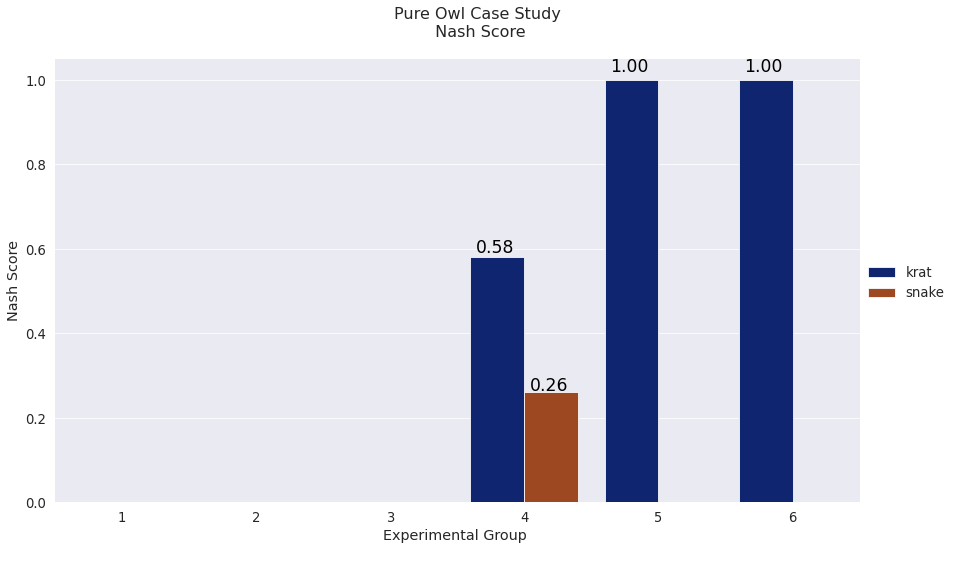

In [56]:

import seaborn as sns
sns.set_style("darkgrid")
sns.set_context('paper', font_scale=1.5)


g = sns.catplot(
    data=owl, kind="bar",
    x="figure_label", y="Nash_Score", hue="org", 
    palette="dark", height=8, aspect=1.5
)
ax = g.facet_axis(0,0)
for p in ax.patches:
    val = p.get_height()
    if val !=0:
        ax.text(p.get_x() + 0.04, 
                p.get_height() * 1.02, 
                '{0:.2f}'.format(p.get_height()), 
                color='black', rotation='horizontal', size='large')
#g.despine(left=True)
g.set_axis_labels("Experimental Group \n", "Nash Score")
g.legend.set_title("")
g.fig.subplots_adjust(top=0.89,bottom=0.12) # adjust the Figure in rp
g.fig.suptitle("Pure Owl Case Study \n Nash Score \n \n \n",
                  fontsize=16, fontdict={"weight": "bold"})
plt.savefig('/home/mremington/Documents/uumarrty_post_sim/uumarrty_post_sim_analysis/images/figs/pure_owl_exp_nash_score_0414.png')

In [39]:
help(g.set_axis_labels)

Help on method set_axis_labels in module seaborn.axisgrid:

set_axis_labels(x_var=None, y_var=None, clear_inner=True, **kwargs) method of seaborn.axisgrid.FacetGrid instance
    Set axis labels on the left column and bottom row of the grid.

